# Parkinson's Disease Detection Project by Srutileka S
### This project uses image classficiation to detect parkinson's based on spiral drawing test 

## Importing libraries 

In [1]:
import os 
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
from skimage.io import imread, imshow 
from skimage.transform import resize 
from skimage.color import rgb2gray
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Importing working directory 

In [3]:
#import working dir
me= os.listdir("C:/Users/lekas/Desktop/drawings/spiral/training/healthy")
je= os.listdir("C:/Users/lekas/Desktop/drawings/spiral/training/parkinson")


## Reading images as matrix

In [4]:
limit=51
me_img=[None]*limit

j=0

for i in me:
    if(j<limit):
        me_img[j]=imread("C:/Users/lekas/Desktop/drawings/spiral/training/healthy/"+i)   
        j+=1
    else:
        break

In [5]:
limit=51
je_img=[None]*limit

j=0

for i in je:
    if(j<limit):
        je_img[j]=imread("C:/Users/lekas/Desktop/drawings/spiral/training/parkinson/"+i)   
        j+=1
    else:
        break

## Reading images in grayscale

In [6]:
limit=51

me_gray=[None]*limit


j=0

for i in me:
    if(j<limit):
        me_gray[j]=rgb2gray(me_img[j])
        j+=1
    else:
        break

In [7]:
limit=51

je_gray=[None]*limit


j=0

for i in je:
    if(j<limit):
        je_gray[j]=rgb2gray(je_img[j])
        j+=1
    else:
        break

## Show image 

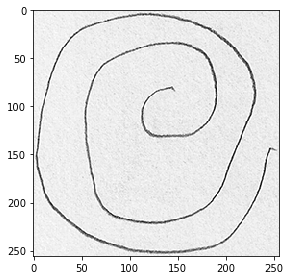

In [8]:
imshow(me_gray[0])

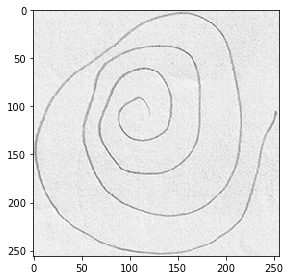

In [9]:
imshow(je_gray[0])

## Define length 

In [10]:
len_of_me=len(me_gray)
len_of_je=len(je_gray)


## Resize all images 

In [11]:
for i in range (51):
    m=me_gray[i]
    me_gray[i]=resize(m,(512,512))

In [12]:
for i in range (51):
    j=je_gray[i]
    je_gray[i]=resize(j,(512,512))

## Flatten images 

In [13]:
image_size_me=me_gray[0].shape
image_size_je=je_gray[0].shape


flatten_me= image_size_me[0]*image_size_me[1]
flatten_je= image_size_je[0]*image_size_je[1]



In [14]:
for i in range (len_of_me):
    me_gray[i]=np.ndarray.flatten(me_gray[i]).reshape(flatten_me,1)

In [15]:
for i in range (len_of_je):
    je_gray[i]=np.ndarray.flatten(je_gray[i]).reshape(flatten_je,1)

In [16]:
me_gray=np.dstack(me_gray)
je_gray=np.dstack(je_gray)


In [17]:
me_gray=np.rollaxis(me_gray, axis=2, start=0)
je_gray=np.rollaxis(je_gray, axis=2, start=0)


In [18]:
me_gray=me_gray.reshape(len_of_me,flatten_me)
je_gray=je_gray.reshape(len_of_je,flatten_je)


## Create Data frames

In [19]:
me_data=pd.DataFrame(me_gray)
je_data=pd.DataFrame(je_gray)


In [20]:
me_data["label"]="Healthy"
je_data["label"]="Parkinson"


In [21]:
me_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.940686,0.940686,0.929902,0.925735,0.928186,0.934804,0.945588,0.951225,0.951716,0.954167,...,0.938971,0.942402,0.936520,0.921324,0.915196,0.918137,0.921569,0.925490,0.925490,Healthy
1,0.952696,0.952696,0.950245,0.950000,0.951961,0.950000,0.944118,0.940931,0.940441,0.941422,...,0.922304,0.898284,0.886520,0.887010,0.889216,0.893137,0.901716,0.914951,0.914951,Healthy
2,0.919608,0.919608,0.919608,0.911275,0.894608,0.888480,0.892892,0.896324,0.898775,0.906373,...,0.929167,0.914951,0.909804,0.913725,0.925245,0.944363,0.948039,0.936275,0.936275,Healthy
3,0.977941,0.977941,0.959314,0.952206,0.956618,0.948775,0.928676,0.932108,0.959069,0.973039,...,0.938725,0.892647,0.897794,0.954167,0.976716,0.965441,0.951961,0.936275,0.936275,Healthy
4,0.958088,0.958088,0.960539,0.962255,0.963235,0.961765,0.957843,0.957353,0.960294,0.957598,...,0.935294,0.945098,0.953676,0.961029,0.956618,0.940441,0.925980,0.913235,0.913235,Healthy
5,0.930392,0.930392,0.918627,0.913235,0.914216,0.923284,0.940441,0.936029,0.910049,0.903431,...,0.945343,0.937990,0.928431,0.916667,0.921324,0.942402,0.949755,0.943382,0.943382,Healthy
6,0.936520,0.936520,0.948775,0.950245,0.940931,0.945098,0.962745,0.966422,0.956127,0.945098,...,0.946324,0.931127,0.930392,0.944118,0.946324,0.937010,0.929167,0.922794,0.922794,Healthy
7,0.937500,0.937500,0.928186,0.927206,0.934559,0.935049,0.928676,0.927941,0.932843,0.938971,...,0.932843,0.937745,0.932108,0.915931,0.905392,0.900490,0.909559,0.932598,0.932598,Healthy
8,0.931127,0.931127,0.940441,0.941176,0.933333,0.931127,0.934559,0.936275,0.936275,0.930392,...,0.928431,0.916667,0.915196,0.924020,0.925000,0.918137,0.919118,0.927941,0.927941,Healthy
9,0.951716,0.951716,0.945343,0.938480,0.931127,0.935539,0.951716,0.960049,0.960539,0.957598,...,0.928922,0.910294,0.905147,0.913480,0.915931,0.912500,0.915686,0.925490,0.925490,Healthy


## Concat into single data frame 

In [22]:
dis=pd.DataFrame()
dis=dis.append(me_data, ignore_index = True)
dis=dis.append(je_data, ignore_index = True)


In [23]:
dis

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.940686,0.940686,0.929902,0.925735,0.928186,0.934804,0.945588,0.951225,0.951716,0.954167,...,0.938971,0.942402,0.936520,0.921324,0.915196,0.918137,0.921569,0.925490,0.925490,Healthy
1,0.952696,0.952696,0.950245,0.950000,0.951961,0.950000,0.944118,0.940931,0.940441,0.941422,...,0.922304,0.898284,0.886520,0.887010,0.889216,0.893137,0.901716,0.914951,0.914951,Healthy
2,0.919608,0.919608,0.919608,0.911275,0.894608,0.888480,0.892892,0.896324,0.898775,0.906373,...,0.929167,0.914951,0.909804,0.913725,0.925245,0.944363,0.948039,0.936275,0.936275,Healthy
3,0.977941,0.977941,0.959314,0.952206,0.956618,0.948775,0.928676,0.932108,0.959069,0.973039,...,0.938725,0.892647,0.897794,0.954167,0.976716,0.965441,0.951961,0.936275,0.936275,Healthy
4,0.958088,0.958088,0.960539,0.962255,0.963235,0.961765,0.957843,0.957353,0.960294,0.957598,...,0.935294,0.945098,0.953676,0.961029,0.956618,0.940441,0.925980,0.913235,0.913235,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.968873,0.968873,0.969363,0.968873,0.967402,0.957843,0.940196,0.927206,0.918873,0.915686,...,0.955637,0.951225,0.946569,0.941667,0.943137,0.950980,0.959069,0.967402,0.967402,Parkinson
98,0.973529,0.973529,0.975490,0.976471,0.976471,0.967157,0.948529,0.944608,0.955392,0.966912,...,0.956618,0.956127,0.957598,0.961029,0.959069,0.951716,0.941667,0.928922,0.928922,Parkinson
99,0.957353,0.957353,0.944608,0.935049,0.928676,0.939951,0.968873,0.974755,0.957598,0.956618,...,0.956127,0.940931,0.944118,0.965686,0.977451,0.979412,0.973284,0.959069,0.959069,Parkinson
100,0.916176,0.916176,0.926961,0.936765,0.945588,0.952451,0.957353,0.957353,0.952451,0.946569,...,0.936275,0.922549,0.926225,0.947304,0.955882,0.951961,0.950735,0.952206,0.952206,Parkinson


## Shuffle dataset 

In [24]:
dis_indexed = shuffle(dis).reset_index()

In [25]:
dis=dis_indexed.drop(["index"],axis=1)

In [26]:
dis

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.968873,0.968873,0.969363,0.968873,0.967402,0.957843,0.940196,0.927206,0.918873,0.915686,...,0.955637,0.951225,0.946569,0.941667,0.943137,0.950980,0.959069,0.967402,0.967402,Parkinson
1,0.849020,0.849020,0.864706,0.889706,0.924020,0.935539,0.924265,0.911275,0.896569,0.895343,...,0.940441,0.950735,0.954657,0.952206,0.945098,0.933333,0.928186,0.929657,0.929657,Parkinson
2,0.925735,0.925735,0.914461,0.914461,0.925735,0.929412,0.925490,0.923284,0.922794,0.920343,...,0.915686,0.921569,0.927696,0.934069,0.936520,0.935049,0.933578,0.932108,0.932108,Parkinson
3,0.937255,0.937255,0.935294,0.935784,0.938725,0.939951,0.939461,0.940441,0.942892,0.942157,...,0.944118,0.940196,0.935294,0.929412,0.920833,0.909559,0.900490,0.893627,0.893627,Healthy
4,0.947794,0.947794,0.943382,0.937990,0.931618,0.932843,0.941667,0.945588,0.944608,0.940686,...,0.930637,0.933088,0.932353,0.928431,0.928431,0.932353,0.931863,0.926961,0.926961,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.916422,0.916422,0.906127,0.911765,0.933333,0.943627,0.942647,0.943627,0.946569,0.946324,...,0.940686,0.929902,0.924020,0.923039,0.919853,0.914461,0.916422,0.925735,0.925735,Parkinson
98,0.954902,0.954902,0.950980,0.947059,0.943137,0.942402,0.944853,0.940686,0.929902,0.928676,...,0.951961,0.946078,0.938480,0.929167,0.926716,0.931127,0.937010,0.944363,0.944363,Healthy
99,0.964706,0.964706,0.962745,0.954657,0.940441,0.932108,0.929657,0.937010,0.954167,0.959559,...,0.928186,0.953186,0.963235,0.958333,0.954902,0.952941,0.955637,0.962990,0.962990,Healthy
100,0.940931,0.940931,0.936520,0.934559,0.935049,0.934314,0.932353,0.933333,0.937255,0.937745,...,0.919853,0.916422,0.915441,0.916912,0.919853,0.924265,0.932353,0.944118,0.944118,Parkinson


## SVM Classification 

### Assigning dependent and independednt variables 

In [27]:
x=dis.values[:,:-1]
y=dis.values[:,-1]

### Splitting Dataset

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

### Training Dataset

In [29]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

### Prediction 

In [30]:
y_pred=clf.predict(x_test)
y_pred

array(['Parkinson', 'Parkinson', 'Parkinson', 'Healthy', 'Healthy',
       'Healthy', 'Parkinson', 'Healthy', 'Healthy', 'Parkinson',
       'Parkinson', 'Parkinson', 'Parkinson', 'Parkinson', 'Parkinson',
       'Healthy', 'Parkinson', 'Parkinson', 'Healthy', 'Parkinson',
       'Parkinson'], dtype=object)

### Visialization 

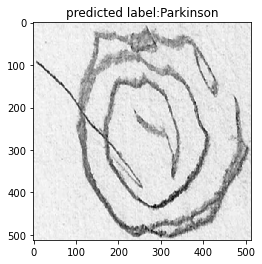

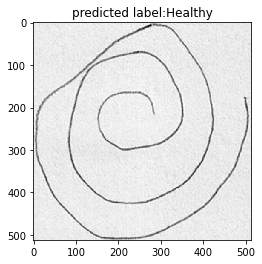

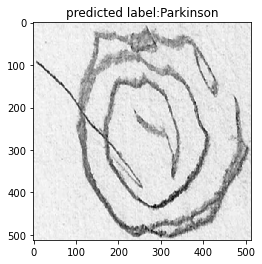

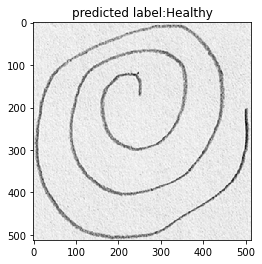

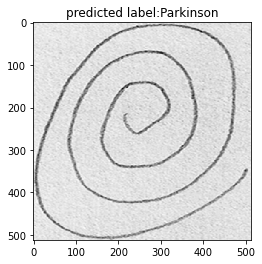

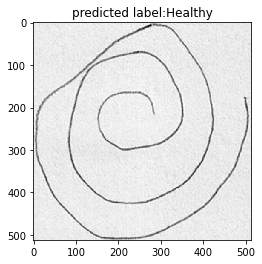

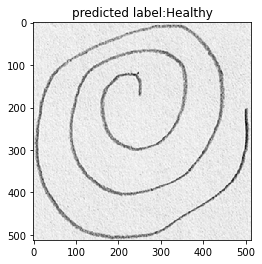

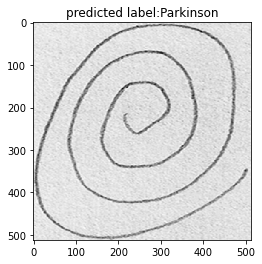

In [31]:
for i in (np.random.randint(0,10,8)):  
    predicted_images=(np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title("predicted label:{0}".format(y_pred[i]))
    plt.imshow(predicted_images,interpolation="nearest", cmap="gray")
    plt.show()

### Check Accuracy 

In [32]:
accuracy = metrics.accuracy_score(y_test,y_pred)

In [33]:
accuracy

0.7619047619047619

In [34]:
confusion_matrix(y_test, y_pred)

array([[7, 5],
       [0, 9]], dtype=int64)